<font style = 'color:green; font-size:30px; font-weight: bold'>Dealing with data of many dimensions</font>

<br>
<font color= 'grey' style='font-size: 30px'>1.2 Importing libraries and Reading data</font>
<hr style = 'border: 2px solid grey'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv"

data = pd.read_csv(uri)
data.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
data.shape

(569, 35)

<font color= 'grey' style='font-size: 30px'>1.3 Manipulating data</font>
<hr style = 'border: 2px solid grey'>

## missing data

In [4]:
data.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [5]:
data_v1 = data.drop(['exame_33', 'id'], axis = 1)

<br>
<font color= 'grey' style='font-size: 30px'>1.3 Building model without reduce dimensions</font>
<hr style = 'border: 2px solid grey'>

## Features and classification variable

In [6]:
X = data_v1.drop('diagnostico', axis = 1)
y = data_v1['diagnostico']

## Train and Test separation

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

## Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

accuracy = rfc_model.score(X_test, y_test)

print(f'Accuracy : {accuracy * 100:.2f}%')

Accuracy : 92.40%


## Dummy Classifier

In [9]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent")

dummy_model.fit(X_train, y_train)

dummy_accuracy = dummy_model.score(X_test, y_test)

print(f'Dummy Accuracy : {dummy_accuracy * 100:.2f}%')

Dummy Accuracy : 61.40%


<br>
<font color= 'grey' style='font-size: 30px'>1.4 Visualization </font>
<hr style = 'border: 2px solid grey'>

## Standarding data

In [10]:
from sklearn.preprocessing import StandardScaler

normalized_model = StandardScaler()
normalized_model.fit(X)
X_values = normalized_model.transform(X)

X_values = pd.DataFrame(data = X_values, columns = X.keys())

## Violin Graphic

In [11]:
def violin_graphic(X_values, start, end):
    """
    Create a violin plot with X values, you can building how many violin plot wanted and choose the start and end data. 

    Parameters
    ----------
    X_values : DataFrame pandas
        Features of the classification
    start : int
        Where start the visualization data
    end : int
        Where end the visualization data
    """
    
    data_v2 = pd.concat([y, X_values.iloc[:, start:end]], axis= 1)
    
    plot_data = pd.melt(
        data_v2, 
        id_vars = 'diagnostico', 
        var_name='exames', 
        value_name='valores'
    )
    
    ax = sns.violinplot(
        x = 'exames', 
        y = 'valores', 
        hue = 'diagnostico', 
        data = plot_data,
        split = True
    )

    ax.figure.set_size_inches(10, 5)
    ax.set_title('Differences between the Diagnostico', fontsize = 20)
    ax.set_xlabel('Exames', fontsize = 16)
    ax.set_ylabel('Valores', fontsize = 16)

    # Using plt because is more easy change ticks
    plt.xticks(rotation = 75);

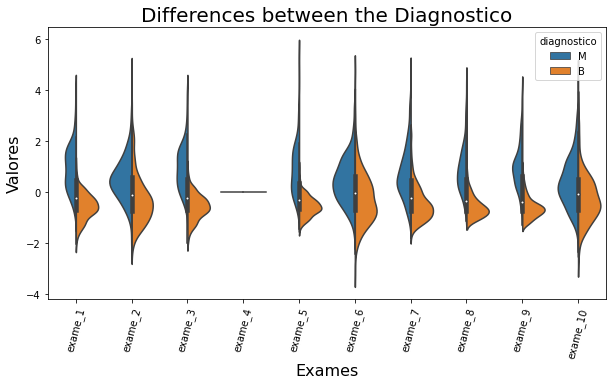

In [12]:
violin_graphic(X_values, 0, 10)

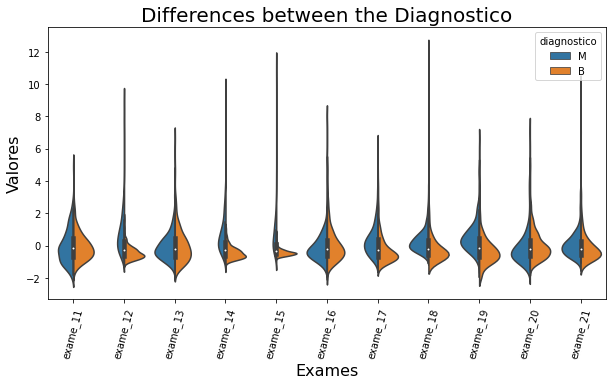

In [13]:
violin_graphic(X_values, 10, 21)

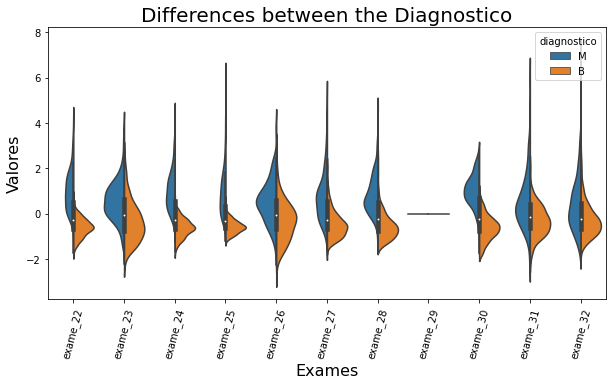

In [14]:
violin_graphic(X_values, 21, 32)

> Looking the graphics, we can drop exame 4 and 29 because all data are eguals

## Dropping

In [15]:
X_values_2 = X_values.drop(['exame_4', 'exame_29'], axis = 1)

<br>
<font color= 'grey' style='font-size: 30px'>1.5 New classification </font>
<hr style = 'border: 2px solid grey'>

In [16]:
def classifier(X_values):
    np.random.seed(1234)
    X_train, X_test, y_train, y_test = train_test_split(X_values, y , test_size = 0.3)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)

    print(f'Accuracy : {accuracy * 100:.2f}%')

In [17]:
classifier(X_values_2)

Accuracy : 92.98%


<br>
<font color= 'grey' style='font-size: 30px'>1.6 Correlation </font>
<hr style = 'border: 2px solid grey'>

In [18]:
corr = X_values_2.corr()

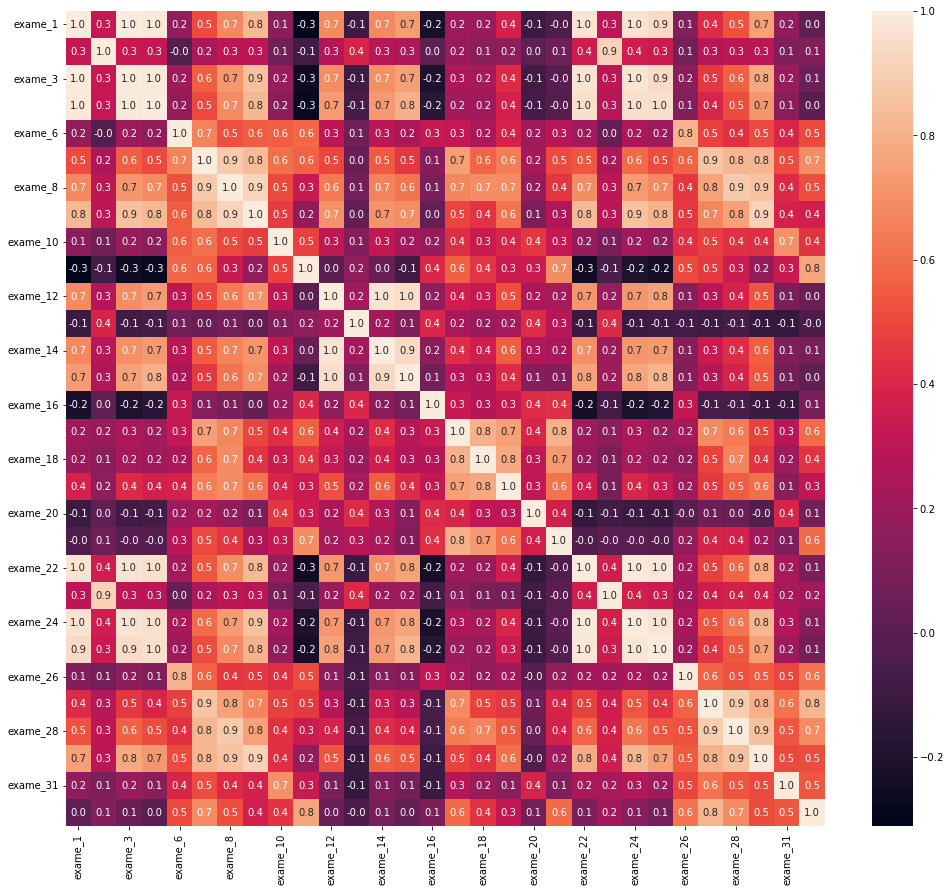

In [19]:
ax = sns.heatmap(
    corr,
    annot = True, fmt = '.1f'
)
ax.figure.set_size_inches(17,15)

In [20]:
corr_v2 = corr[corr > 0.99]
corr_v3 = corr_v2.sum()
corr_v3

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [21]:
correlated_variables = corr_v3[corr_v3 > 1]
correlated_variables

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

## Dropping variables with many correlation

> When we have variables with high correlation, we should discard half of them

In [22]:
X_values_3 = X_values_2.drop(['exame_3', 'exame_24'], axis = 1)

In [23]:
X_values_3

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [24]:
classifier(X_values_3)

Accuracy : 92.98%


<br>
<font color= 'grey' style='font-size: 30px'>1.7 Selecting the best features</font>
<hr style = 'border: 2px solid grey'>

In [25]:
# Here i used X because need to X without normalization
# Dropping all exames, but now without normalization

np.random.seed(1234)
X_values_4 = X.drop(['exame_4', 'exame_29', 'exame_3', 'exame_24'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_values_4, y , test_size = 0.3)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(chi2, k = 5)

best_features.fit(X_train, y_train)
best_features_train = best_features.transform(X_train)
best_features_test = best_features.transform(X_test)

In [27]:
best_features_train.shape

(398, 5)

In [28]:
best_features_test.shape

(171, 5)

## Building model with only 5 variables

In [29]:
rfc_model_5 = RandomForestClassifier()
rfc_model_5.fit(best_features_train, y_train)

accuracy = rfc_model_5.score(best_features_test, y_test)
print(f'Accuracy : {accuracy * 100:.2f}%')

Accuracy : 92.98%


<br>
<font color= 'grey' style='font-size: 30px'>1.8 Validating result</font>
<hr style = 'border: 2px solid grey'>

In [31]:
from sklearn.metrics import confusion_matrix

predicted = rfc_model_5.predict(best_features_test)

metric_confusion_matrix = confusion_matrix(y_test, predicted)
metric_confusion_matrix

array([[101,   4],
       [  8,  58]])

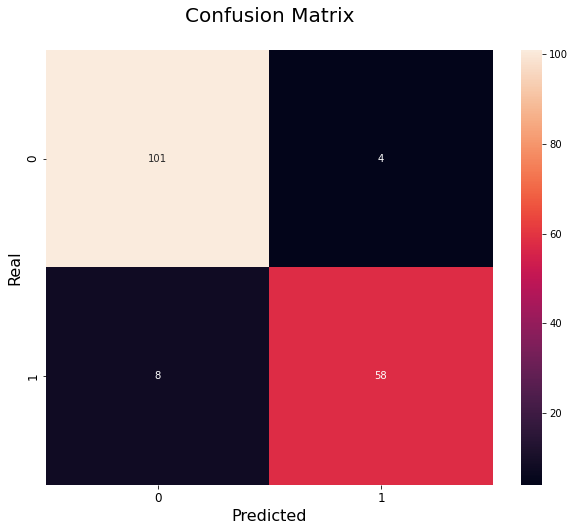

In [32]:
ax = sns.heatmap(
    metric_confusion_matrix,
    annot = True,
    fmt = "d"
)

ax.figure.set_size_inches(10, 8)
ax.set_title('Confusion Matrix', fontsize = 20, y = 1.05)
ax.set_xlabel('Predicted', fontsize = 16)
ax.set_ylabel('Real', fontsize = 16)
ax.tick_params(labelsize=12)

sns.set(font_scale = 2)

## RFE

In [35]:
from sklearn.feature_selection import RFE

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X_values_4, y , test_size = 0.3)

rfe_model = RandomForestClassifier()
rfe_model.fit(X_train, y_train)

rfe_selector = RFE(estimator = rfe_model, n_features_to_select=5, step = 1)
rfe_selector.fit(X_train, y_train)
rfe_train = rfe_selector.transform(X_train)
rfe_test = rfe_selector.transform(X_test)

rfe_model.fit(rfe_train, y_train)

accuracy = rfe_model.score(rfe_test, y_test)
print(f'Accuracy : {accuracy * 100:.2f}%')

Accuracy : 90.06%


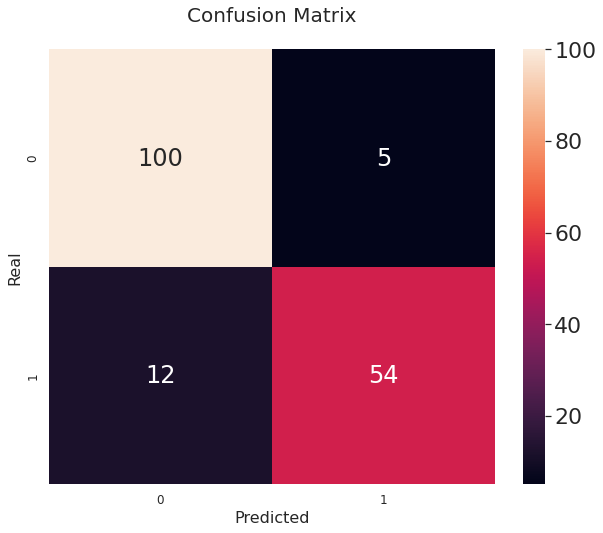

In [37]:
predicted = rfe_model.predict(rfe_test)
metric_confusion_matrix = confusion_matrix(y_test, predicted)

ax = sns.heatmap(
    metric_confusion_matrix,
    annot = True,
    fmt = "d"
)

ax.figure.set_size_inches(10, 8)
ax.set_title('Confusion Matrix', fontsize = 20, y = 1.05)
ax.set_xlabel('Predicted', fontsize = 16)
ax.set_ylabel('Real', fontsize = 16)
ax.tick_params(labelsize=12)

sns.set(font_scale = 2)